Ayudantía 23/04 Metodo de Newton \\
Ante cualquier consulta o posible correccion mandar correo a tito.orellana@usm.cl \\

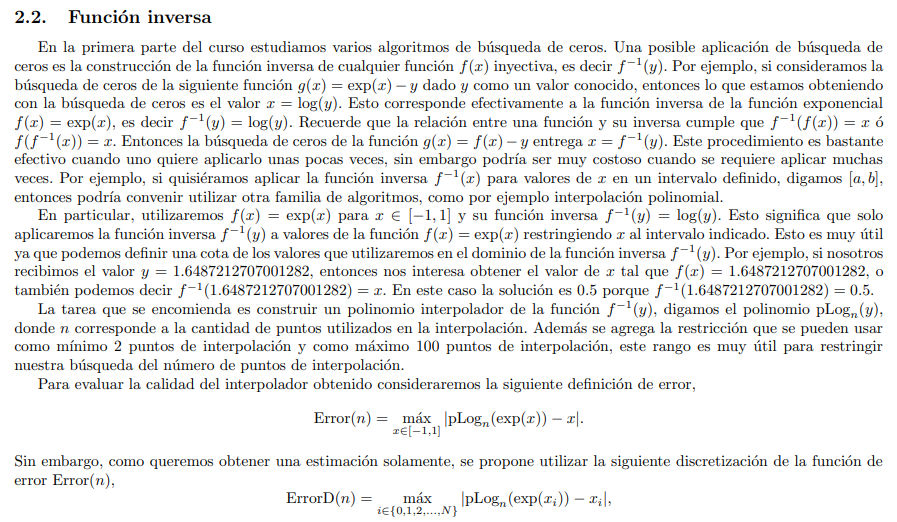

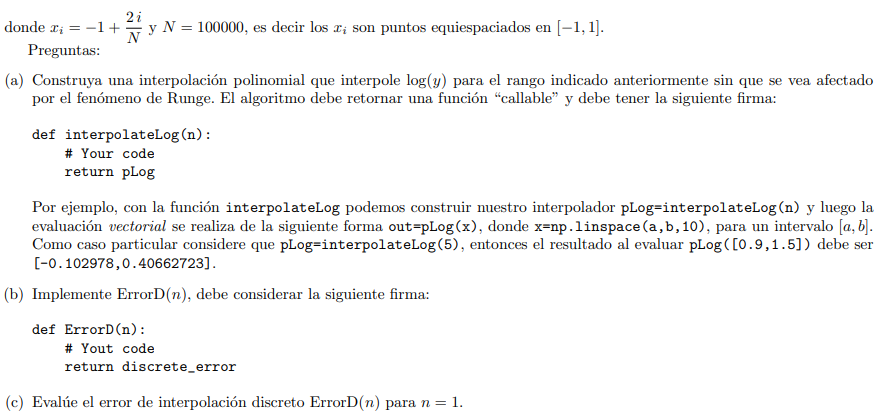

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator

Segun enunciado, debemos generar puntos xi equispaciados con la formula indicada. Se les aplicara funcion exp al conjunto xi para poder obtener el conjunto x_e a interpolar, el conjunto y_e a interpolar correponde a los valores originalmente calculados como xi, esto se deba que se esta intepolando la funcion inversa de exp(x), es decir log(y). Utilizamos baricentrica ya que es menos costosa computacionalmente.

In [3]:
def puntos(n):
  i = np.arange(n+1)
  xi = -1 +  (2*i / n)
  y = np.exp(xi)
  y_e = xi #np.log(y)
  x_e = y
  return x_e, y_e

def interpolateLog(n):
  x_e, y_e = puntos(n)
  pLog = BarycentricInterpolator(x_e,y_e)
  return pLog

def ErrorD(n):
  pLog = interpolateLog(n)
  i = np.arange(100000+1)
  xi = -1 +  (2*i / 100000)
  x_exp = np.exp(xi)
  error = np.abs(pLog(x_exp)-xi)
  discrete_error = max(error)
  print("El error máximo es: ", discrete_error)
  return xi, x_exp, pLog(x_exp), error

xi, x_exp, interpolated_values, error = ErrorD(40)

errormx = max(error)
errormx

El error máximo es:  8836535.106190104


np.float64(8836535.106190104)

En el siguiente grafico podemos observar la curva que se genera con el interpolador dependiendo la cantidad de puntos que utilicemos:

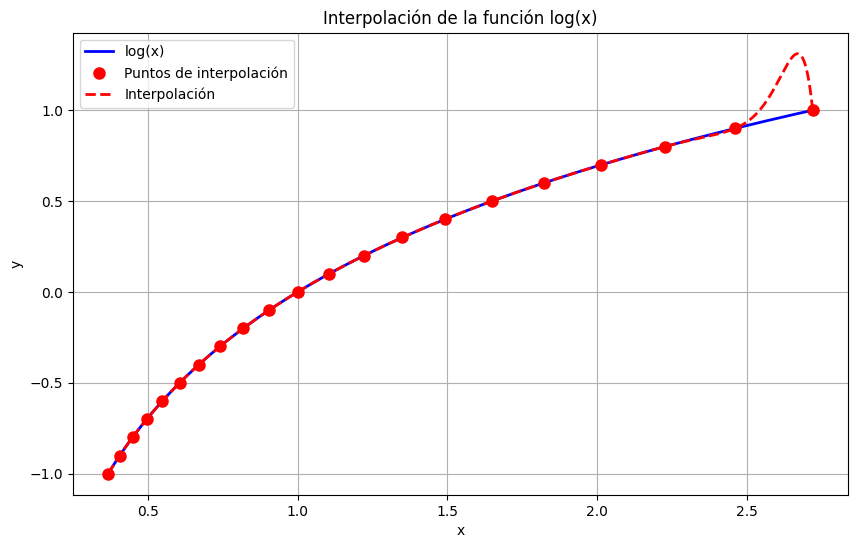

In [4]:


# Función para graficar puntos de interpolación y la interpolación obtenida
def plot_interpolation(n):
    x_e, y_e = puntos(n)  # Puntos de interpolación
    pLog = interpolateLog(n)  # Interpolación baricéntrica

    # Valores para evaluar la interpolación
    i = np.arange(100000+1)
    xi = -1 +  (2*i / 100000)
    y = np.exp(xi)
    x_vals = y
    y_vals = np.log(x_vals)  # Logaritmo real de x

    # Evaluar la interpolación para los mismos valores
    y_interpolated = pLog(x_vals)

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='log(x)', color='blue', linewidth=2, linestyle='-')
    plt.plot(x_e, y_e, 'ro', label='Puntos de interpolación', markersize=8)  # Puntos de interpolación
    plt.plot(x_vals, y_interpolated, label='Interpolación', color='red', linestyle='--', linewidth=2)  # Curva interpolada
    plt.title('Interpolación de la función log(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar la interpolación para n = 50
plot_interpolation(20)

El ejercicio 2 corresponde a 2.22. Back to the Future de [Guia_C2_2024_2](https://usmcl-my.sharepoint.com/personal/claudio_torres_usm_cl/Documents/INF-285/ScientificComputing_SharedFolder_2025-1/03%20Gu%C3%ADas%20para%20cert%C3%A1menes/Gu%C3%ADas%202024-2/Gu%C3%ADa_C2_2024_2.pdf?CT=1745431259634&OR=ItemsView#page=14&zoom=100,37,762) (tiene pauta en el mismo documento)